# 执行当前cell，并自动跳到下一个cell：Shift Enter

执行当前cell，执行后不自动调转到下一个cell：Ctrl-Enter

是当前的cell进入编辑模式：Enter

退出当前cell的编辑模式：Esc

删除当前的cell：双D

为当前的cell加入line number：单L

将当前的cell转化为具有一级标题的maskdown：单1

将当前的cell转化为具有二级标题的maskdown：单2

将当前的cell转化为具有三级标题的maskdown：单3

为一行或者多行添加/取消注释：Crtl /

撤销对某个cell的删除：z

浏览器的各个Tab之间切换：Crtl PgUp和Crtl PgDn

快速跳转到首个cell：Crtl Home

快速跳转到最后一个cell：Crtl End11

# 四、Jupyter Notebook如何导入代码1

## 问题背景：有一个test.py文件，需要将其载入到jupyter的一个cell中 
test.py内容如下

方法步骤： 
（1）在需要导入该段代码的cell中输入

%load bayers.py #bayers.py是当前路径下的一个python文件

利用快捷键“Shift+Enter”，可以看到如下结果： 

In [1]:
# %load bayers.py
"""
Created on Fri Mar  9 19:15:01 2018

@author: yanghe
"""

import   numpy as np

def loadDataSet():
    postingList = [['my','dog','has','flea','problems','help','please'],
                   ['maybe','not','take','him','to','dog','park','stupid'],
                   ['my','dalmation','is','so','cute','I','love','him'],
                   ['stop','posting','stupid','worthless','garbage'],
                   ['mr','licks','ate','my','steak','how','to','stop','him'],
                   ['quit','buying','worthless','dog','food','stupid']]
    classVec = [0,1,0,1,0,1]
    return postingList, classVec

    
    
def createVocabList(dataSet):
    vocabSet = set([])      #创建一个空集
    for document in dataSet:
        vocabSet = vocabSet | set(document)   #创建两个集合的并集
    return list(vocabSet)
    
    
    
    #将文档词条转换成词向量
def setOfWords2Vec(vocabList, inputSet):
    returnVec = [0]*len(vocabList)        #创建一个其中所含元素都为0的向量
    for word in inputSet:
        if word in vocabList:
            #returnVec[vocabList.index(word)] = 1     #index函数在字符串里找到字符第一次出现的位置  词集模型
            returnVec[vocabList.index(word)] += 1      #文档的词袋模型    每个单词可以出现多次
        else: 
            print ("the word: %s is not in my Vocabulary!" % word)
    return returnVec
def trainNB0(trainMatrix, trainCategory):
    numTrainDocs = len(trainMatrix)
    numWords = len(trainMatrix[0])
    pAbusive = sum(trainCategory)/float(numTrainDocs)
    # p0Num = zeros(numWords); p1Num = zeros(numWords)
    #p0Denom = 0.0; p1Denom = 0.0
    p0Num = np.ones(numWords);   #避免一个概率值为0,最后的乘积也为0
    p1Num = np.ones(numWords);   #用来统计两类数据中，各词的词频     
    p0Denom = 2.0;  #用于统计0类中的总数
    p1Denom = 2.0  #用于统计1类中的总数 
    for i in range(numTrainDocs):
        if trainCategory[i] == 1:
            p1Num += trainMatrix[i]
            p1Denom += sum(trainMatrix[i])
        else:
            p0Num += trainMatrix[i]
            p0Denom += sum(trainMatrix[i])        
    
    # p1Vect = p1Num / p1Denom
    #p0Vect = p0Num / p0Denom
    p1Vect = np.log(p1Num / p1Denom)    #在类1中，每个次的发生概率
    p0Vect = np.log(p0Num / p0Denom)      #避免下溢出或者浮点数舍入导致的错误   下溢出是由太多很小的数相乘得到的
    return p0Vect, p1Vect, pAbusive

def classifyNB(vec2Classify, p0Vec, p1Vec, pClass1):
    p1 = sum(vec2Classify*p1Vec) + np.log(pClass1)
    p0 = sum(vec2Classify*p0Vec) + np.log(1.0-pClass1)
    if p1 > p0:
        return 1
    else: return 0
def testingNB():
    listOPosts, listClasses = loadDataSet()
    myVocabList = createVocabList(listOPosts)
    trainMat = []
    for postinDoc in listOPosts:
        trainMat.append(setOfWords2Vec(myVocabList, postinDoc))
    p0V, p1V, pAb = trainNB0(np.array(trainMat), np.array(listClasses))
    testEntry = ['love','my','dalmation']
    thisDoc = np.array(setOfWords2Vec(myVocabList, testEntry))
    print (testEntry, 'classified as: ', classifyNB(thisDoc, p0V, p1V, pAb))
    testEntry = ['stupid','garbage']
    thisDoc = np.array(setOfWords2Vec(myVocabList, testEntry))
    print (testEntry, 'classified as: ', classifyNB(thisDoc, p0V, p1V, pAb))
    
testingNB()    
    
    
    

['love', 'my', 'dalmation'] classified as:  0
['stupid', 'garbage'] classified as:  1


3）可以看到，运行后，%load test.py被自动加入了注释符号#，

bayers.py中的所有代码都被load到了当前的cell中

并输出了 ，运行结果

# 4.2 从网络load代码到jupyter

在cell中输入 %load https://matplotlib.org/mpl_examples/color/color_cycle_demo.py
然后运行该cell，就会将load后面所对应地址的代码load到当前的cell中；

下面给出一个例子，导入matplotlib中的一个小例子color example code

首先，在想要导入该段代码的cell中输入 :

%load https://matplotlib.org/mpl_examples/color/color_cycle_demo.py

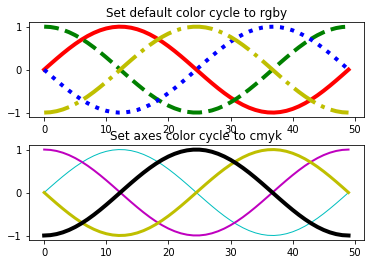

In [2]:
# %load https://matplotlib.org/mpl_examples/color/color_cycle_demo.py
"""
===================
Styling with cycler
===================

Demo of custom property-cycle settings to control colors and other style
properties for multi-line plots.

This example demonstrates two different APIs:

    1. Setting the default rc parameter specifying the property cycle.
       This affects all subsequent axes (but not axes already created).
    2. Setting the property cycle for a single pair of axes.
"""
from cycler import cycler
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(0, 2 * np.pi)
offsets = np.linspace(0, 2*np.pi, 4, endpoint=False)
# Create array with shifted-sine curve along each column
yy = np.transpose([np.sin(x + phi) for phi in offsets])

# 1. Setting prop cycle on default rc parameter
plt.rc('lines', linewidth=4)
plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b', 'y']) +
                           cycler('linestyle', ['-', '--', ':', '-.'])))
fig, (ax0, ax1) = plt.subplots(nrows=2)
ax0.plot(yy)
ax0.set_title('Set default color cycle to rgby')

# 2. Define prop cycle for single set of axes
ax1.set_prop_cycle(cycler('color', ['c', 'm', 'y', 'k']) +
                   cycler('lw', [1, 2, 3, 4]))
ax1.plot(yy)
ax1.set_title('Set axes color cycle to cmyk')

# Tweak spacing between subplots to prevent labels from overlapping
fig.subplots_adjust(hspace=0.3)
plt.show()


3）可以看到，运行后，

%load https://matplotlib.org/mpl_examples/color/color_cycle_demo.py 

被自动加入了注释符号#，test.py中的所有代码都被load到了当前的cell中

# 五、Jupyter运行python文件

利用jupyter的cell是可以运行python文件的，即在cell中运行如下代码：

In [3]:
%run bayers.py

['love', 'my', 'dalmation'] classified as:  0
['stupid', 'garbage'] classified as:  1


bayers.py 为要运行的python程序，

结果会显示在该cell中 


# 六、Jupyter一些其他琐碎用法

6.1 jupyter的cell可以作为unix command使用

具体方法为：在unitx command前面加入一个感叹号“！”

## 查看python版本

In [4]:
! python --version

Python 3.5.2 :: Continuum Analytics, Inc.


## 运行python文件

In [5]:
!python bayers.py

['love', 'my', 'dalmation'] classified as:  0
['stupid', 'garbage'] classified as:  1


## 6.3 获取current working directory2

In [6]:
current_path = %pwd
current_path

'E:\\python\\computer'

## 6.4 使用Matplotlib绘图

在Jupyter Notebook中，如果使用Matplotlib绘图，有时是弹不出图像框的，此时，可以在开头加入

%matplotlib inline

# 你可以通过修改内核选项ast_note_interactivity，使得Jupyter对独占一行的所有变量或者语句都自动显示
，这样你就可以马上看到多个语句的运行结果了。

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.DataFrame(np.random.randn(5,4))

In [4]:
data.head()
data.tail()

,0,1,2,3
0,-1.587784,-0.279549,0.909739,0.181523
1,-0.035821,2.615358,0.459575,-0.268085
2,-1.077362,0.683665,0.516593,-0.755739
3,0.431051,0.268775,-1.092543,0.010276
4,-0.473357,-2.249139,1.579788,-1.540658


# 以通过修改内核选项ast_note_interactivity1

In [5]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [6]:
data.head()
data.tail()

,0,1,2,3
0,-1.587784,-0.279549,0.909739,0.181523
1,-0.035821,2.615358,0.459575,-0.268085
2,-1.077362,0.683665,0.516593,-0.755739
3,0.431051,0.268775,-1.092543,0.010276
4,-0.473357,-2.249139,1.579788,-1.540658


,0,1,2,3
0,-1.587784,-0.279549,0.909739,0.181523
1,-0.035821,2.615358,0.459575,-0.268085
2,-1.077362,0.683665,0.516593,-0.755739
3,0.431051,0.268775,-1.092543,0.010276
4,-0.473357,-2.249139,1.579788,-1.540658


# Jupyter Magic命令

%run:运行python代码
%run ./two-histograms.ipynb

    

%load：从外部脚本中**代码
%load ./hello_world.py


%store：在notebook文件之间传递变量
data = 'this is the string I want to pass to different notebook'
%store data
#del data # This has deleted the variable
现在，在一个新的notebook文档里……

%store -r data
print(data)



%who：列出所有的全局变量

 %who str
    
    
Magic-计时

有两种用于计时的jupyter magic命令： 
%%time 和 %timeit.当你有一些很耗时的代码，
想要查清楚问题出在哪时，这两个命令非常给力。 

%%time 会告诉你cell内代码的单次运行时间信息。
%%time
        import time
        for _ in range(1000):
            time.sleep(0.01)# sleep for 0.01 seconds

输出 ：CPU times: user 21.5 ms, sys: 14.8 ms, total: 36.3 ms
        Wall time: 11.6 s
            
            
%%timeit 使用了Python的 timeit 模块，该模块运行某语句100，000次（默认值），
然后提供最快的3次的平均值作为结果。
 import numpy
%timeit numpy.random.normal(size=100)

# 在notebook内部运行shell命令很简单，这样你就可以看到你的工作文件夹里有哪些数据集。添加  符号 ‘！’ 例如 ！python

In [11]:
!dir  *.csv

 驱动器 E 中的卷是 文档
 卷的序列号是 2AF0-8CDF

 E:\python\computer 的目录



找不到文件


# 在notebook内用不同的内核运行代码

如果你想要，其实可以把不同内核的代码结合到一个notebook里运行。 

只需在每个单元格的起始，用Jupyter magics调用kernal的名称：
%%bash 

%%HTML 

%%python2 

%%python3

%%ruby 

%%perl